In [1]:
import pandas as pd 

In [2]:
from pandas_profiling import ProfileReport
import dabl

In [3]:
# load data
wine_df=pd.read_csv('red_wine_quality.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
wine_df.shape

(1599, 12)

In [6]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
# report=ProfileReport(wine_df)
# # lets save the report
# report.to_file('pandas_profiling_report.html')

In [9]:
# according to the report, it has 220 duplicate rows
# lets identify and remove them
wine_df.drop_duplicates(keep=False,inplace=True)

In [10]:
wine_df.shape

(1139, 12)

In [11]:
#lets check the profiling  report again
report2=ProfileReport(wine_df)
report2.to_file('pandas_profiling_report.html')

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
# lets check the dabl classifier
bc=dabl.SimpleClassifier(random_state=21).fit(wine_df,target_col='quality')
bc

Running DummyClassifier()
accuracy: 0.421 recall_macro: 0.167 precision_macro: 0.070 f1_macro: 0.099
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.421 recall_macro: 0.167 precision_macro: 0.070 f1_macro: 0.099

Running GaussianNB()
accuracy: 0.531 recall_macro: 0.312 precision_macro: 0.303 f1_macro: 0.304
=== new best GaussianNB() (using recall_macro):
accuracy: 0.531 recall_macro: 0.312 precision_macro: 0.303 f1_macro: 0.304

Running MultinomialNB()
accuracy: 0.539 recall_macro: 0.219 precision_macro: 0.177 f1_macro: 0.191
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.039 recall_macro: 0.258 precision_macro: 0.011 f1_macro: 0.021
Running DecisionTreeClassifier(class_weight='balanced', max_depth=6)
accuracy: 0.429 recall_macro: 0.324 precision_macro: 0.284 f1_macro: 0.270
=== new best DecisionTreeClassifier(class_weight='balanced', max_depth=6) (using recall_macro):
accuracy: 0.429 recall_macro: 0.324 precision_macro: 0.284 f1_macro

SimpleClassifier(random_state=21)

C:\Users\HP\anaconda3\lib\site-packages\dabl\plot\utils.py:378: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(


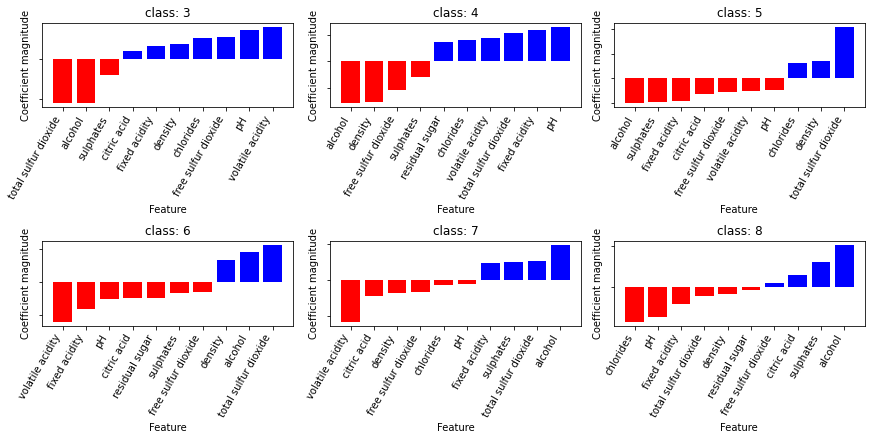

In [13]:
# feature importance
dabl.explain(bc)

In [14]:
# lets check the correlation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:>

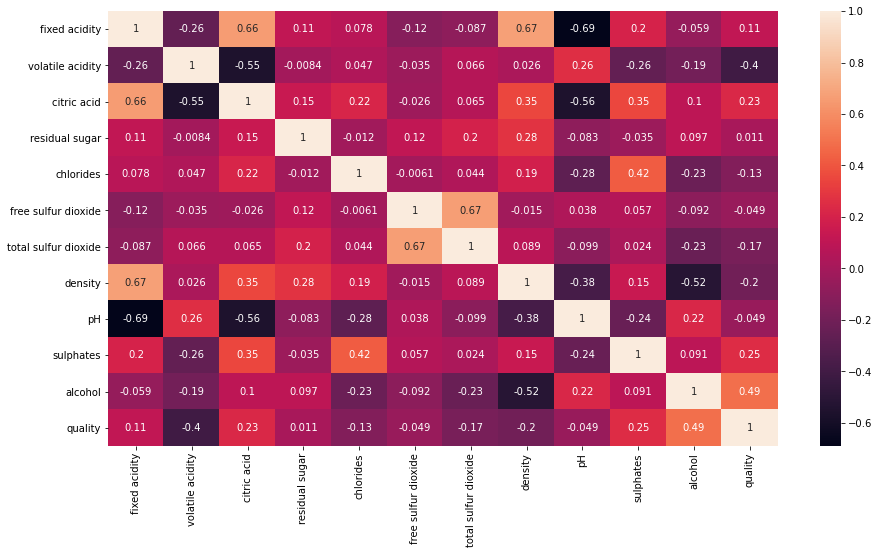

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(wine_df.corr(),annot=True)

In [16]:
wine_df.to_csv('final_wine_data.csv',index=False)